![Alt text](https://miro.medium.com/v2/resize:fit:960/0*puClFxWSP4buuk08.gif "a title")

In [4]:
# packages
import pandas as pd # for data processing
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt

In [3]:
netflix_data = pd.read_csv("dataset/cleaned_netflix_data.csv")
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,TV Show,On the Verge,Unknown,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States","September 7, 2021",2021,TV-MA,1 Season,"TV Comedies, TV Dramas","Four women — a chef, a single mom, an heiress ..."
3,Movie,Stowaway,Joe Penna,"Anna Kendrick, Toni Collette, Daniel Dae Kim, ...","Germany, United States","April 22, 2021",2021,TV-MA,116 min,"Dramas, International Movies, Thrillers",A three-person crew on a mission to Mars faces...
4,Movie,Wild Dog,Ahishor Solomon,"Nagarjuna Akkineni, Dia Mirza, Saiyami Kher, A...",Unknown,"April 22, 2021",2020,TV-MA,126 min,"Action & Adventure, International Movies",A brash but brilliant Indian intelligence agen...


In [24]:
netflix_data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [25]:
netflix_data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [26]:
# Shape of the dataset
netflix_data.shape

(8807, 11)

In [27]:
# check non unique values 
netflix_data.nunique()

type               2
title           8807
director        4529
cast            7693
country          749
date_added      1767
release_year      74
rating            14
duration         220
listed_in        514
description     8775
dtype: int64

In [28]:
# check for duplicate values
netflix_data.duplicated().sum()

0

In [29]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


Heat map to shop null values count

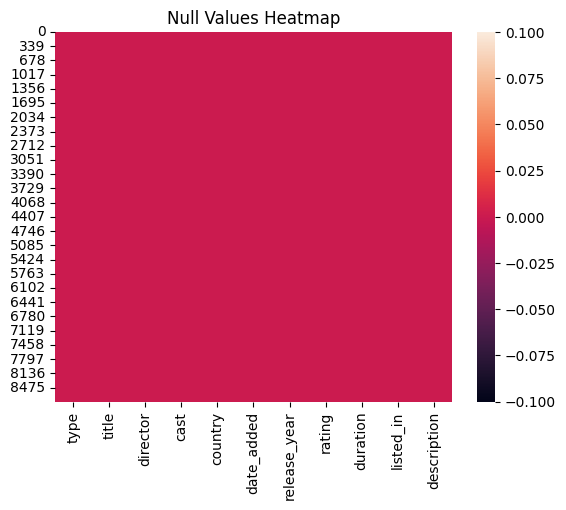

In [5]:
sns.heatmap(netflix_data.isnull())
plt.title('Null Values Heatmap')
plt.show()

In [30]:
# understanding variables
variables = pd.DataFrame(columns=['Variable','Num of unique values','values'])

for i,var in enumerate(netflix_data.columns):
    variables.loc[i] = [var,netflix_data[var].nunique(),netflix_data[var].unique().tolist()]

variables

,Variable,Num of unique values,values
0,type,2,"[Movie, TV Show]"
1,title,8807,"[Dick Johnson Is Dead, The Starling, On the Ve..."
2,director,4529,"[Kirsten Johnson, Theodore Melfi, Unknown, Joe..."
3,cast,7693,"[Unknown, Melissa McCarthy, Chris O'Dowd, Kevi..."
4,country,749,"[United States, France, United States, Germany..."
5,date_added,1767,"[September 25, 2021, September 24, 2021, Septe..."
6,release_year,74,"[2020, 2021, 2015, 2013, 2018, 2017, 2019, 201..."
7,rating,14,"[PG-13, TV-MA, TV-14, TV-Y, TV-Y7, R, PG, TV-P..."
8,duration,220,"[90 min, 104 min, 1 Season, 116 min, 126 min, ..."
9,listed_in,514,"[Documentaries, Comedies, Dramas, TV Comedies,..."


In [6]:
netflix_data['title'].unique()

array(['Dick Johnson Is Dead', 'The Starling', 'On the Verge', ...,
       'HOMUNCULUS', 'Life in Color with David Attenborough',
       'Searching For Sheela'], dtype=object)

SHOW THE TITTLE OF THE TV SHOWS IN UK

In [20]:
# netflix_data[(netflix_data['country'].isin(['United Kingdom']))]
country_data = netflix_data['country'].value_counts()
country_data.columns = ['country', 'Count']
country_data.to_csv('country_data.csv', index=False)

In [18]:
# netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'].isin(['United Kingdom']))] 

# look into the records
# uk_data = netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'] == 'United States')] 
# Export the DataFrame to a CSV file
# uk_data.to_csv('us_data.csv', index=False)

# netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'] == 'United Kingdom')] ['title']

